### Low-Rank Matrix Factorization and LinUCB algorithm

In [71]:
import pandas as pd
import numpy as np
from scipy.sparse.linalg import svds as svd
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

print(plt.style.available)

['seaborn-whitegrid', 'seaborn-colorblind', 'seaborn-white', 'bmh', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'fivethirtyeight', 'fast', '_classic_test', 'seaborn-pastel', 'dark_background', 'seaborn-poster', 'seaborn-ticks', 'seaborn-talk', 'seaborn-deep', 'grayscale', 'seaborn-bright', 'Solarize_Light2', 'seaborn-paper', 'seaborn', 'seaborn-notebook', 'seaborn-muted', 'ggplot', 'classic']


In [39]:
#Loading prerocessed in R dataset of user-item ratings
ratings = pd.read_csv('LasVegasRatings.csv', index_col=0, nrows=10000)
ratings.head()

,--9e1ONYQuAa-CB_Rrw7Tw,-_TSaVr53qiEGqMkwyEMaQ,-_yEVC3_3M6YOsamYfNFEw,-3zffZUHoY8bQjGfPSoBKQ,-8R_-EkGpUhBk55K9Dd4mg,-9YyInW1wapzdNZrhQJ9dg,-a857YYdjzgOdOjFFRsRXQ,-AD5PiuJHgdUcAK-Vxao2A,-Bf8BQ3yMk8U2f45r2DRKw,-BmqghX1sv7sgsxOIS2yAg,...,ZyHdmeEnucnlMlK2Yk8fUQ,ZYkAMs9UcYuwaXSiGczSkA,zYKNDLEExBNKQQrW6vvz_Q,ZyOLevFrV7Vxi0OOS3lf-w,ZyTrka-HiVb6Ckcl0rDaNA,ZZbaD-DKkILA_FvliElciw,ZzERMgdUTkAeFKZFDwPh-A,zZkzpVgMP8xaXg3uMscCjQ,Zzl4ffV9kFY3yOSSgyRUBQ,zZn22GJCl6f2fCrnUBQhcA
---udAKDsn0yQXmzbWQNSw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
--_5wWxmGfXcYDQOhWQUlQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
--8ELb8W1afbyP21EZStPg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
--A4pFATzQJx9n4l1IAC3A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
--AujbGl6SYRaY8SFVNHXA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
ratings.columns = np.arange(1,4030)
ratings.reset_index(inplace=True, drop=True)
ratings.head()

,1,2,3,4,5,6,7,8,9,10,...,4020,4021,4022,4023,4024,4025,4026,4027,4028,4029
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
# Fill NaN with 0
ratings.fillna(0, inplace=True)
ratings.head()

,1,2,3,4,5,6,7,8,9,10,...,4020,4021,4022,4023,4024,4025,4026,4027,4028,4029
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
# Normalizing dataset: de-mean and convert it from a dataframe to a numpy array
ratings_matrix = ratings.as_matrix()
ratings_mean = np.mean(ratings_matrix, axis = 1)
ratings_matrix_normalized = ratings_matrix - ratings_mean.reshape(-1, 1)
ratings_matrix_normalized

array([[-0.08666667, -0.08666667, -0.08666667, ..., -0.08666667,
        -0.08666667, -0.08666667],
       [-0.3       , -0.3       , -0.3       , ..., -0.3       ,
        -0.3       , -0.3       ],
       [-0.27333333, -0.27333333,  3.72666667, ..., -0.27333333,
        -0.27333333, -0.27333333],
       ..., 
       [ 3.94      , -0.06      , -0.06      , ..., -0.06      ,
        -0.06      , -0.06      ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.03333333, -0.03333333, -0.03333333, ..., -0.03333333,
        -0.03333333, -0.03333333]])

In [47]:
# Selecting top 1000 users and top 150 restaurants
ratings = ratings.ix[ratings_na.isnull().sum(axis=1).sort_values().index[:1000]]
ratings = ratings.ix[:, ratings_na.isnull().sum().sort_values().index[:150]]

In [50]:
# Predicting complete rating matrix with an arbitrary k = 30
U, sigma, Vt = svd(ratings_matrix_normalized, k = 30)
sigma = np.diag(sigma)
ratings_pred = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)
ratings_pred_df = pd.DataFrame(ratings_pred, columns = ratings.columns, index=ratings.index)
ratings_pred_df.head()

,2932,1389,1405,383,2032,2106,1675,1676,2377,1071,...,1916,2152,845,3305,3809,3390,1038,3018,226,2298
2132,-0.080878,-0.132181,-0.156149,-0.077048,-0.039577,-0.137403,0.109304,0.044399,0.022251,0.243810,...,0.198298,0.143811,0.250763,0.092197,0.310191,0.235521,0.051400,0.147916,0.146387,0.183476
6998,0.290925,-0.101648,-0.105611,0.179951,-1.100536,-0.196297,0.322241,0.331906,-0.780217,-0.103215,...,0.044149,0.012707,-0.417142,0.465207,0.637215,-0.600179,0.394843,0.094169,0.135951,0.067493
9264,-0.189508,0.007974,3.873229,0.133424,-0.002583,0.011325,0.098720,-0.185930,5.286888,-0.002984,...,0.059140,-0.241733,-0.032619,-0.092056,-0.095773,0.350868,0.008155,-0.026018,-0.171943,-0.078502
2571,0.100184,-0.344636,0.096821,0.127157,-0.326063,-0.270517,-0.218395,-0.431779,-0.234860,-0.221120,...,0.306529,0.030243,0.093972,-0.089946,0.010067,-0.123795,-0.088226,-0.149092,0.246750,0.028170
2424,-0.157904,-0.169882,-0.069084,0.040477,-0.317968,-0.145742,0.248353,0.297100,-0.143535,0.326838,...,0.097593,0.154904,0.045185,0.186526,-0.249410,-0.208479,0.033571,0.110419,0.150373,0.134361


In [51]:
# Scaling rating predictions from 0 to 5
ratings_pred_df = pd.DataFrame(preprocessing.MinMaxScaler((0,5)).fit_transform(ratings_pred_df))
ratings_pred_df.head()

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0.470654,0.531700,0.373393,0.434747,0.805474,0.240314,2.304896,1.816512,0.895660,1.504760,...,2.697153,2.453845,1.946720,1.544608,1.181997,1.218220,0.913685,0.785618,2.387484,1.656770
1,0.791581,0.555690,0.416663,0.644506,0.000000,0.189322,3.208534,2.583305,0.270052,1.135197,...,1.750733,1.619419,0.000000,4.063707,1.463333,0.416679,1.540668,0.691500,2.322145,1.014762
2,0.376889,0.641819,3.823341,0.606531,0.833560,0.369084,2.259981,1.202214,5.000000,1.241938,...,1.842772,0.000000,1.120757,0.300264,0.832750,1.328851,0.834738,0.481035,0.394586,0.206630
3,0.626940,0.364774,0.589985,0.601416,0.587976,0.125062,0.914242,0.546522,0.695215,1.009635,...,3.361657,1.731029,1.489727,0.314517,0.923803,0.873591,0.658787,0.265517,3.015803,0.797096
4,0.404168,0.502079,0.447938,0.530669,0.594122,0.233093,2.894977,2.490476,0.766413,1.593179,...,2.078864,2.524446,1.347528,2.181652,0.700579,0.792369,0.881138,0.719956,2.412433,1.384904


In [52]:
# Defining LinUCB algorithm
def LinUCB(Vt, ratings_pred_df, user, trials, delta):
    context_vectors = pd.DataFrame(Vt.T)
    user_restaurants = ratings_pred_df.iloc[user].sort_values(ascending=False)
    alpha = 1 + np.sqrt((np.log(2/delta))/2)
    t = 0
    regret_list = []

    while t < trials:
        if t == 0:
            p_list = []
            for ix, X in context_vectors.iterrows():
                A = np.identity(len(Vt))
                b = np.zeros(len(Vt))
                theta = np.dot(np.linalg.inv(A), b)
                p = np.dot(theta.T, X) + alpha*(np.sqrt(np.dot(np.dot(X.T, np.linalg.inv(A)), X)))
                p_list.append((p, ix))
            arm = max(p_list)[1]
            payoff = ratings_pred_df.iloc[user,arm]
            A = A + np.dot(X, X.T)
            b = b + payoff*X
            max_payoff = max(user_restaurants)
            regret = max_payoff - payoff
            regret_list.append(regret)
            context_vectors = context_vectors.drop(user_restaurants.argmax())
            user_restaurants = user_restaurants.drop(user_restaurants.argmax())

        else:
            ix = 0
            p_list = []
            for ix, X in context_vectors.iterrows():
                theta = np.dot(np.linalg.inv(A), b)
                p = np.dot(theta.T, X) + alpha*(np.sqrt(np.dot(np.dot(X.T, np.linalg.inv(A)), X)))
                p_list.append((p, ix))
            arm = max(p_list)[1]
            context_vectors = context_vectors.drop(user_restaurants.argmax())
            max_payoff = max(user_restaurants)
            payoff = ratings_pred_df.iloc[user,arm]
            A = A + np.dot(X, X.T)
            b = b + payoff*X
            regret = max_payoff - payoff  
            regret_list.append(regret)
            user_restaurants = user_restaurants.drop(user_restaurants.argmax())
            
        t = t + 1
    return regret_list

In [21]:
regret = []
regret_trial = []
regret_df = pd.DataFrame()
deltas = [.25, .5, .75]

for delta in deltas:
    for trials in range(1,100):
        for users in range(0,10):
            regret_trial.append(np.mean(LinUCB(Vt, ratings_pred_df, users, trials, delta)))
        regret.append(np.mean(regret_trial))
    regret_df['delta ' + str(delta)] = regret
    regret = []

In [53]:
regret_df.head()

,delta 0.25,delta 0.5,delta 0.75
0,3.937658,2.248384,2.236530
1,3.927529,2.264909,2.244934
2,3.910435,2.280706,2.253050
3,3.891007,2.295774,2.260871
4,3.869682,2.310088,2.268376


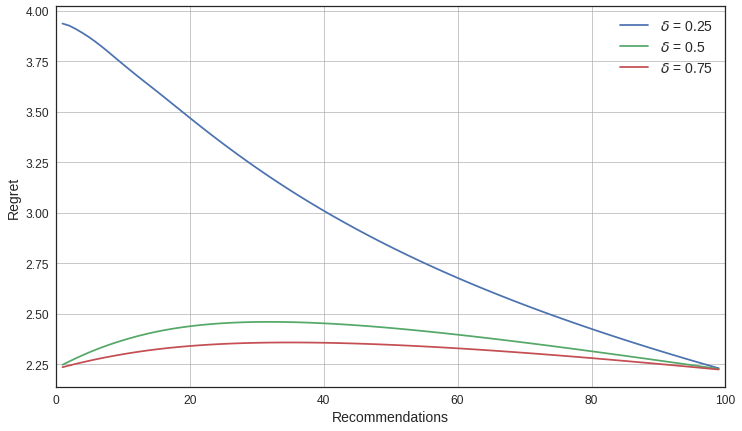

In [85]:
fig = plt.figure(figsize=(12,7))
plt.style.use('seaborn-notebook')
for i, delta in zip(range(len(regret_df.columns)), deltas):
    plt.plot(range(1, len(regret_df)+1), regret_df.iloc[:,i], label=r'$\delta$ = '+str(delta))
     
plt.xlim(0, 100)    
plt.legend(fontsize=14)
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12)  
plt.xlabel('Recommendations', fontsize=14)
plt.ylabel('Regret', fontsize=14);
plt.grid(b=True, which='both', color='0.65',linestyle='-', alpha = 0.75, linewidth = 0.8)